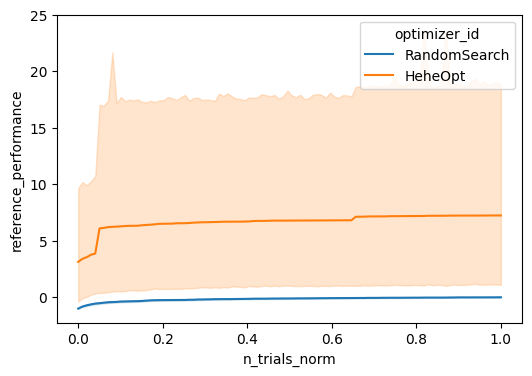

In [9]:
from __future__ import annotations

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

from carps.analysis.utils import savefig, filter_only_final_performance
from carps.analysis.gather_data import process_logs


def norm_by_opt(df: pd.DataFrame, optimizer_id: str) -> pd.DataFrame:
    df_new = []
    for gid, gdf in df.groupby(by=["problem_id", "seed"]):
        # Get the reference incumbent cost trajectory
        reference = gdf[gdf["optimizer_id"]==optimizer_id]["trial_value__cost_inc"]
        def norm_by_ref(x: pd.Series) -> pd.Series:
            # Normalize each trajectory by the reference
            # if x.name == optimizer_id:
            #     return x
            x = x.to_numpy()
            r = reference.to_numpy()
            return -np.divide(x - r.min(), r.max() - r.min())
        # Apply the normalization per problem, optimizer, seed
        # It needs to be grouped like this because we need the reference trajectory
        gdf["reference_performance"] = gdf.groupby("optimizer_id")["trial_value__cost_inc"].transform(norm_by_ref)
        df_new.append(gdf)
    df = pd.concat(df_new).reset_index(drop=True)
    return df
    


df = pd.read_parquet("/scratch/hpc-prf-intexml/cbenjamins/repos/CARP-S-Experiments/lib/CARP-S/runs/RandomSearch/MFPBench/logs.parquet")

df_new = df.copy()
df_new["optimizer_id"] = "HeheOpt"
mag = 0.5
df_new["trial_value__cost"] -= np.random.uniform(low=0, high=mag, size=len(df_new))
df_new["trial_value__cost_inc"] = df_new.groupby(by=["problem_id", "optimizer_id", "seed"])["trial_value__cost"].transform("cummin")
df = pd.concat([df, df_new]).reset_index(drop=True)

fig, ax = plt.subplots(figsize=(6,4))
normalize_by_opt = "RandomSearch"
df = norm_by_opt(df, "RandomSearch")

# print(df[df["optimizer_id"]=="HeheOpt"]["trial_value__cost_inc_normopt"].unique())

sns.lineplot(data=df, x="n_trials_norm", y="reference_performance", hue="optimizer_id")

df_final = filter_only_final_performance(df)

<Axes: xlabel='optimizer_id', ylabel='reference_performance'>

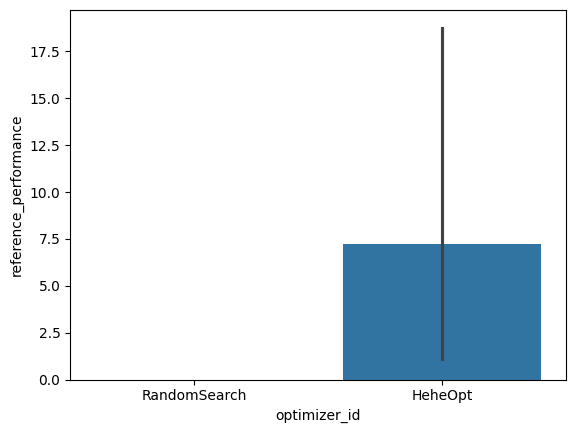

In [10]:
sns.barplot(data=df_final, x="optimizer_id", y="reference_performance")

In [11]:
df_final

,n_trials,n_function_calls,trial_info__config,trial_info__instance,trial_info__seed,trial_info__budget,trial_info__normalized_budget,trial_info__name,trial_info__checkpoint,trial_value__cost,...,problem.benchmark_kwargs.noise,experiment_id,n_trials_norm,trial_value__cost_norm,trial_value__cost_inc,trial_value__cost_inc_norm,scenario,time,time_norm,reference_performance
99,100.0,100.0,"[0.8243624089443661, 0.5585247280569781, 0.360...",None,None,100,1.0,None,None,-0.142143,...,None,69,1.0,0.963188,-3.854414,0.000000,multi-fidelity,100.476204,0.975864,-0.000000
199,100.0,100.0,"[0.8243624089443661, 0.5585247280569781, 0.360...",None,None,100,1.0,None,None,-0.441845,...,None,69,1.0,0.963188,-4.027464,0.000000,multi-fidelity,100.476204,0.975864,0.048597
299,100.0,100.0,"[0.7501331456254998, 0.7098298352287479, 0.587...",None,None,100,1.0,None,None,-1.004950,...,None,67,1.0,0.739323,-3.829525,0.006458,multi-fidelity,102.499099,0.995709,-0.000000
399,100.0,100.0,"[0.7501331456254998, 0.7098298352287479, 0.587...",None,None,100,1.0,None,None,-1.297578,...,None,67,1.0,0.739323,-4.038200,0.006458,multi-fidelity,102.499099,0.995709,0.055445
499,100.0,100.0,"[0.7299760774673607, 0.48523619556905173, 0.27...",None,None,100,1.0,None,None,-0.195258,...,None,64,1.0,0.949407,-3.595076,0.067288,multi-fidelity,100.803210,0.979072,-0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23599,100.0,100.0,"[0.6505590561239776, 0.26942654675719374, 0.70...",None,None,19,1.0,None,None,0.289636,...,None,1,1.0,0.065445,-0.086729,0.023671,multi-fidelity,730734.723247,0.908734,8.588085
23699,100.0,100.0,"[0.6023845072102733, 0.44977751140207234, 0.22...",None,None,19,1.0,None,None,0.486866,...,None,0,1.0,0.216984,0.363659,0.001009,multi-fidelity,768959.676366,0.956611,-0.000000
23799,100.0,100.0,"[0.6023845072102733, 0.44977751140207234, 0.22...",None,None,19,1.0,None,None,0.039390,...,None,0,1.0,0.216984,-0.070458,0.001009,multi-fidelity,768959.676366,0.956611,0.829516
23899,100.0,100.0,"[0.17656331368445877, 7.020539420626114e-05, 0...",None,None,19,1.0,None,None,0.900628,...,None,3,1.0,0.942285,0.385974,0.040126,multi-fidelity,769790.969190,0.957652,-0.000000
